<a href="https://colab.research.google.com/github/TejashreePatil8951/DeepLearning/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression with Keras

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 1: Read the dataset

In [ ]:
import pandas as pd
url ="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df=pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### step 2: perform basic data qulity

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
df.duplicated().sum()

41

In [ ]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [ ]:
df = df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93



Seperate X and Y (PE)

In [ ]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


Step 4: Preprocess X using pipeline

In [ ]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')


In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837



Apply Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [ ]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [ ]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [ ]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [ ]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [ ]:
xtrain.shape

(7621, 4)

In [ ]:
xtest.shape

(1906, 4)

In [ ]:
xtrain.shape[1]

4

Step 5: Build the neural network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [ ]:
# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))

In [ ]:
# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")

In [ ]:
hist = model.fit(xtrain, ytrain,
                 validation_data=(xtest, ytest),
                 epochs=60)

Epoch 1/60
239/239 [==============================] - 4s 4ms/step - loss: 199096.7656 - mae: 445.8923 - val_loss: 183789.0938 - val_mae: 428.4883
Epoch 2/60
239/239 [==============================] - 1s 3ms/step - loss: 142990.5312 - mae: 375.0724 - val_loss: 90808.7656 - val_mae: 296.6251
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 51182.1992 - mae: 205.9323 - val_loss: 24947.2559 - val_mae: 133.7463
Epoch 4/60
239/239 [==============================] - 1s 5ms/step - loss: 19741.7676 - mae: 119.2843 - val_loss: 15430.2822 - val_mae: 105.5228
Epoch 5/60
239/239 [==============================] - 1s 5ms/step - loss: 13204.3574 - mae: 97.5345 - val_loss: 10252.2383 - val_mae: 85.7683
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 8423.8359 - mae: 77.5993 - val_loss: 6152.1465 - val_mae: 66.1199
Epoch 7/60
239/239 [==============================] - 1s 3ms/step - loss: 4854.3018 - mae: 58.5024 - val_loss: 3332.3979 - val_mae: 48.1287

In [ ]:
hist.history["loss"]

[199096.765625,
 142990.53125,
 51182.19921875,
 19741.767578125,
 13204.357421875,
 8423.8359375,
 4854.3017578125,
 2609.489990234375,
 1424.364501953125,
 859.3836059570312,
 564.2825317382812,
 388.8258361816406,
 277.1575012207031,
 202.9620819091797,
 151.58143615722656,
 116.10857391357422,
 90.70440673828125,
 72.2627944946289,
 58.83858871459961,
 48.894248962402344,
 41.666831970214844,
 36.29521942138672,
 32.36903381347656,
 29.320371627807617,
 27.13361167907715,
 25.47461700439453,
 24.287336349487305,
 23.379777908325195,
 22.56546401977539,
 22.157197952270508,
 21.747642517089844,
 21.473878860473633,
 21.27089500427246,
 21.17328643798828,
 20.8223876953125,
 20.726272583007812,
 20.68280601501465,
 20.70197105407715,
 20.68926239013672,
 20.437318801879883,
 20.271408081054688,
 20.129880905151367,
 20.011432647705078,
 20.102783203125,
 20.328201293945312,
 20.02851676940918,
 20.163841247558594,
 20.019750595092773,
 19.835386276245117,
 20.015750885009766,
 20.047

In [ ]:
hist.history['val_loss']

[183789.09375,
 90808.765625,
 24947.255859375,
 15430.2822265625,
 10252.23828125,
 6152.146484375,
 3332.39794921875,
 1741.0919189453125,
 987.7101440429688,
 620.490478515625,
 416.56231689453125,
 291.06390380859375,
 209.0063018798828,
 156.88339233398438,
 119.39826202392578,
 92.21465301513672,
 73.54167175292969,
 60.4807014465332,
 49.742210388183594,
 42.701881408691406,
 36.538055419921875,
 32.63337707519531,
 29.485675811767578,
 27.138113021850586,
 25.40086555480957,
 24.3595027923584,
 23.2841739654541,
 23.557165145874023,
 22.702980041503906,
 22.030179977416992,
 21.953907012939453,
 21.4278564453125,
 21.447120666503906,
 21.801769256591797,
 21.245100021362305,
 20.852325439453125,
 21.46270751953125,
 20.439838409423828,
 21.192598342895508,
 20.16648292541504,
 20.12295913696289,
 19.99726676940918,
 20.26708221435547,
 22.415878295898438,
 19.731786727905273,
 19.553884506225586,
 19.826303482055664,
 19.494985580444336,
 20.10296058654785,
 20.434389114379883,

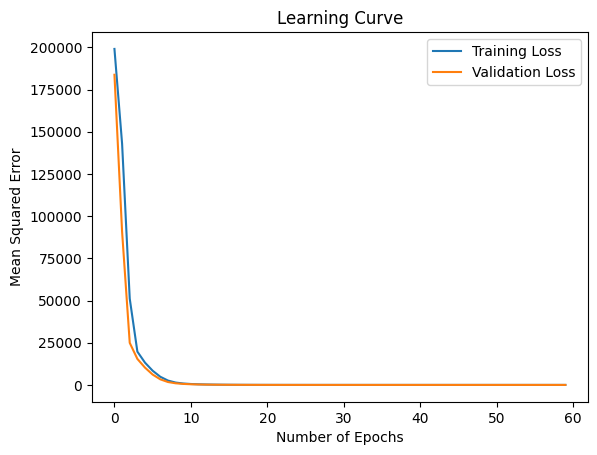

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [ ]:
model.evaluate(xtrain, ytrain)

239/239 [==============================] - 0s 2ms/step - loss: 22.3172 - mae: 3.6924


[22.31717300415039, 3.6923863887786865]

In [ ]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 6ms/step - loss: 22.5155 - mae: 3.7234


[22.51546859741211, 3.723428964614868]

### Predict the results for train and test

In [ ]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 6ms/step


In [ ]:
ypred_train[0:5]

array([[449.697  ],
       [475.65436],
       [466.19684],
       [431.7494 ],
       [464.55243]], dtype=float32)

In [ ]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [ ]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9223548002896538

In [ ]:
# R2 score in test
r2_score(ytest, ypred_test)


0.9253935083027455


Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [ ]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [ ]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [ ]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 4ms/step


array([[443.7264 ],
       [437.74878],
       [430.86676],
       [438.3902 ],
       [471.51575]], dtype=float32)

In [ ]:
xnew["PowerOutput_pred"] = preds

In [ ]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,443.726410
1,28.88,54.89,1007.16,46.60,437.748779
2,27.89,73.21,1001.32,85.88,430.866760
3,25.69,62.26,1011.38,74.08,438.390198
4,12.16,40.81,1025.79,70.97,471.515747
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,435.371643
96,11.78,39.96,1011.37,82.95,469.568298
97,5.62,41.38,1020.91,86.21,481.186523
98,24.96,74.99,1008.25,80.52,435.396606


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

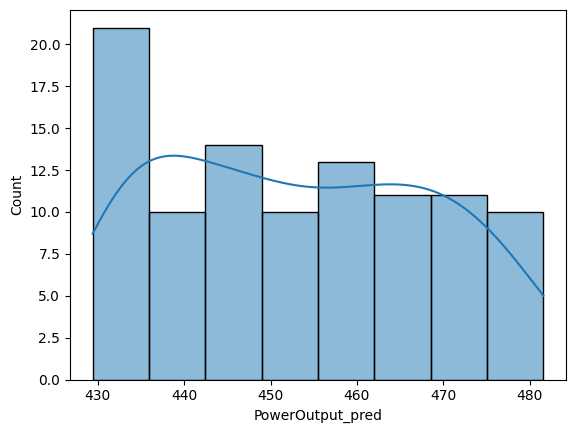

In [ ]:

import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)

In [ ]:
xnew.to_csv("Results.csv", index=False)